In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

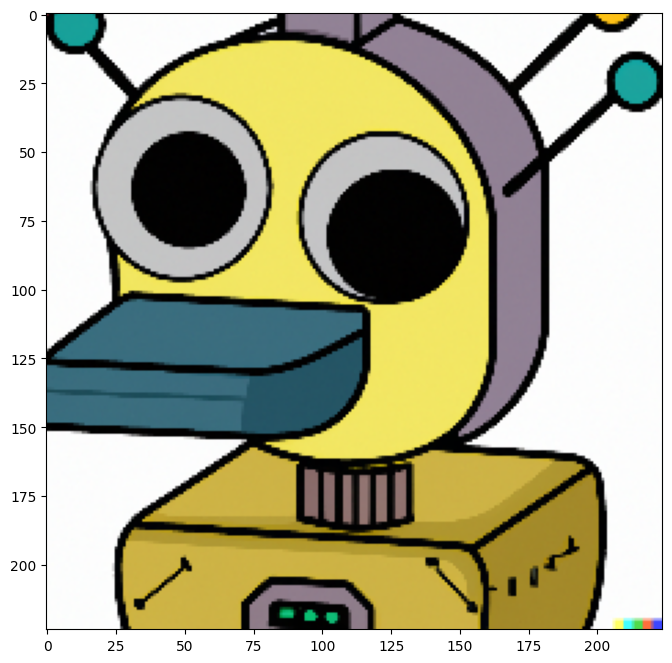

In [21]:
from os import pathsep




height = 224
width = 224
font_size = 20
plt.figure(figsize=(15, 8))


img=cv2.imread('./duck.png')
resized_img = cv2.resize(img, (height, width))
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.show()

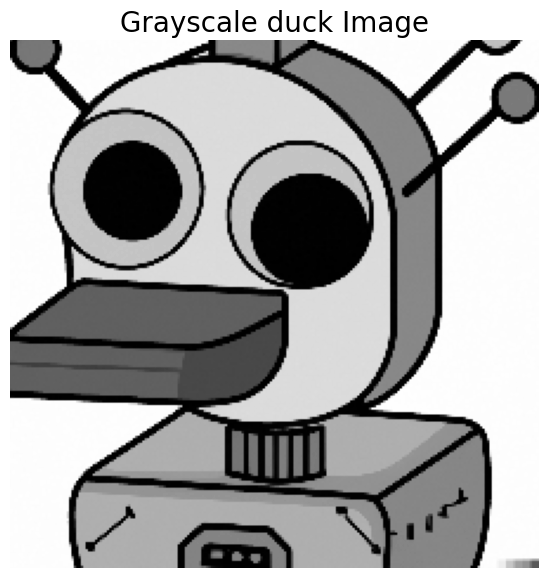

In [22]:
#grayscaleimage
plt.figure(figsize=(15, 8))
path='./duck.png'
name = os.path.split(path)[-1]
img = cv2.imread(path, 0)
resized_img = cv2.resize(img, (height, width))
plt.subplot(1, 2,  1).set_title(f'Grayscale {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img, cmap='gray')
plt.show()

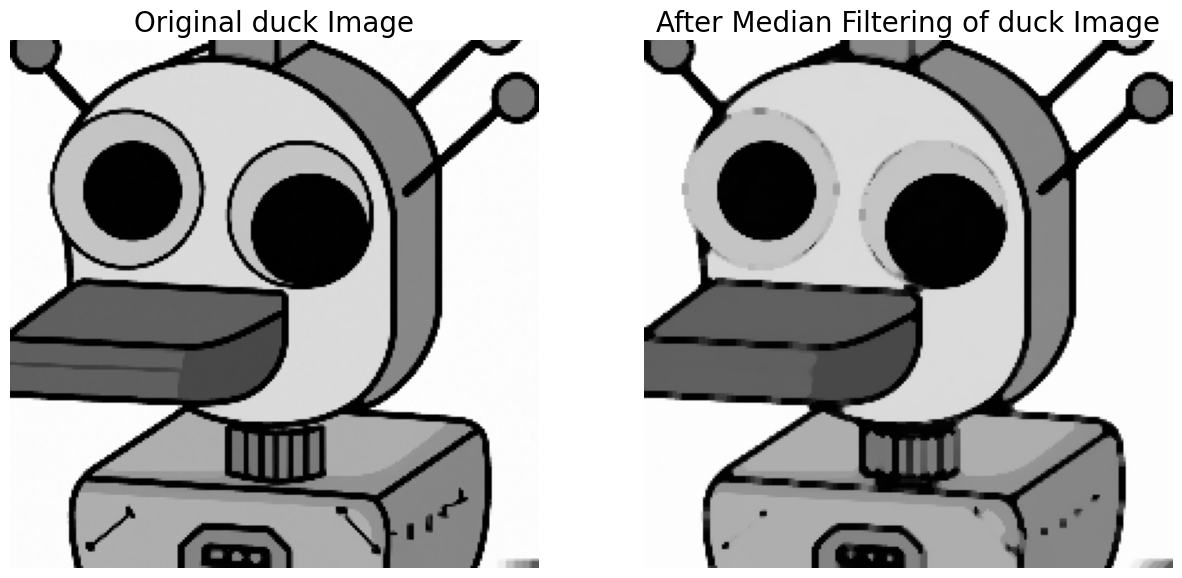

In [23]:
#image denoising
denoised_img = cv2.medianBlur(resized_img, 5)
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title(f'Original {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2).set_title(f'After Median Filtering of {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.show()

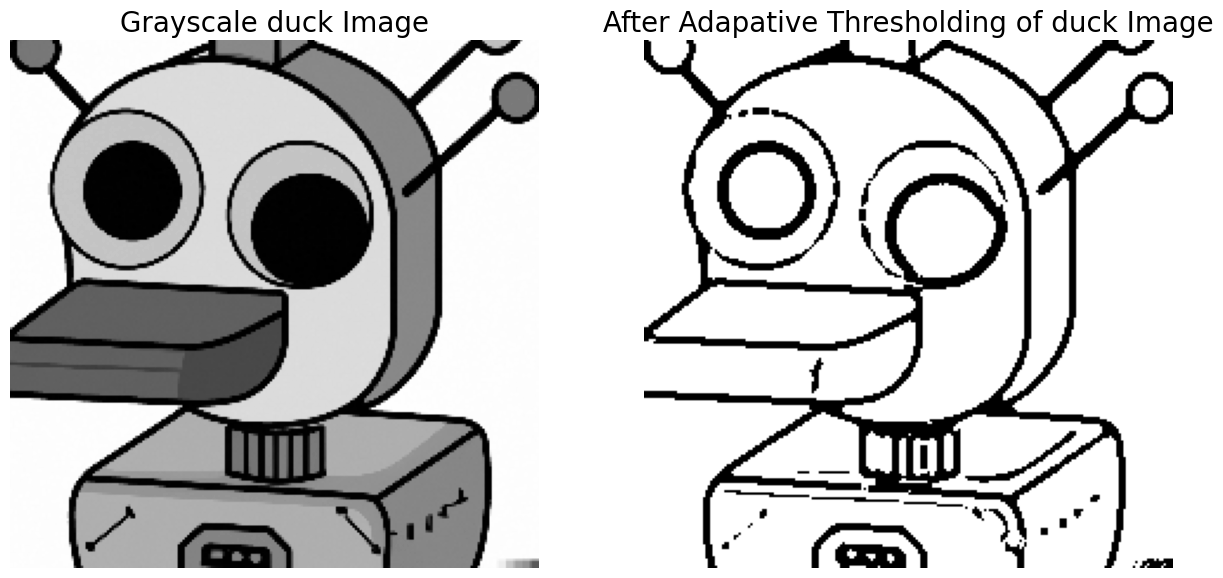

In [24]:
#image thresholding
denoised_img = cv2.medianBlur(resized_img, 5)
th = cv2.adaptiveThreshold(denoised_img, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 11, C = 2)
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title(f'Grayscale {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img, cmap = 'gray')
plt.subplot(1, 2, 2).set_title(f'After Adapative Thresholding of {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))
plt.show()

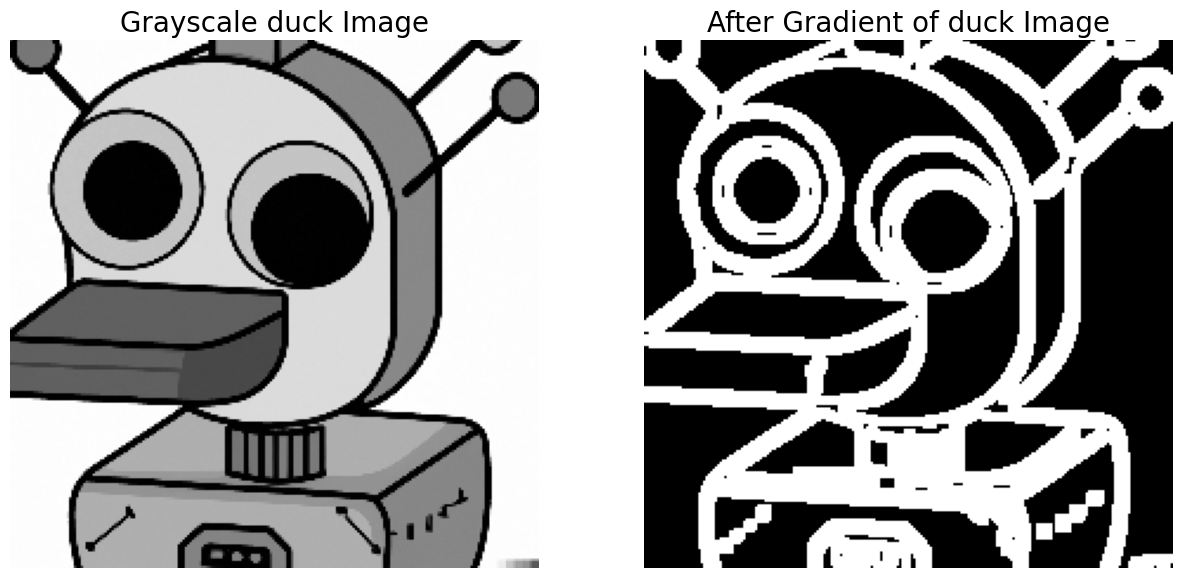

In [25]:
#image gradient
denoised_img = cv2.medianBlur(resized_img, 5)
th = cv2.adaptiveThreshold(denoised_img, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 11, C = 2)
kernel = np.ones((5, 5), np.uint8)
gradient = cv2.morphologyEx(th, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title(f'Grayscale {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img, cmap = 'gray')
plt.subplot(1, 2, 2).set_title(f'After Gradient of {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


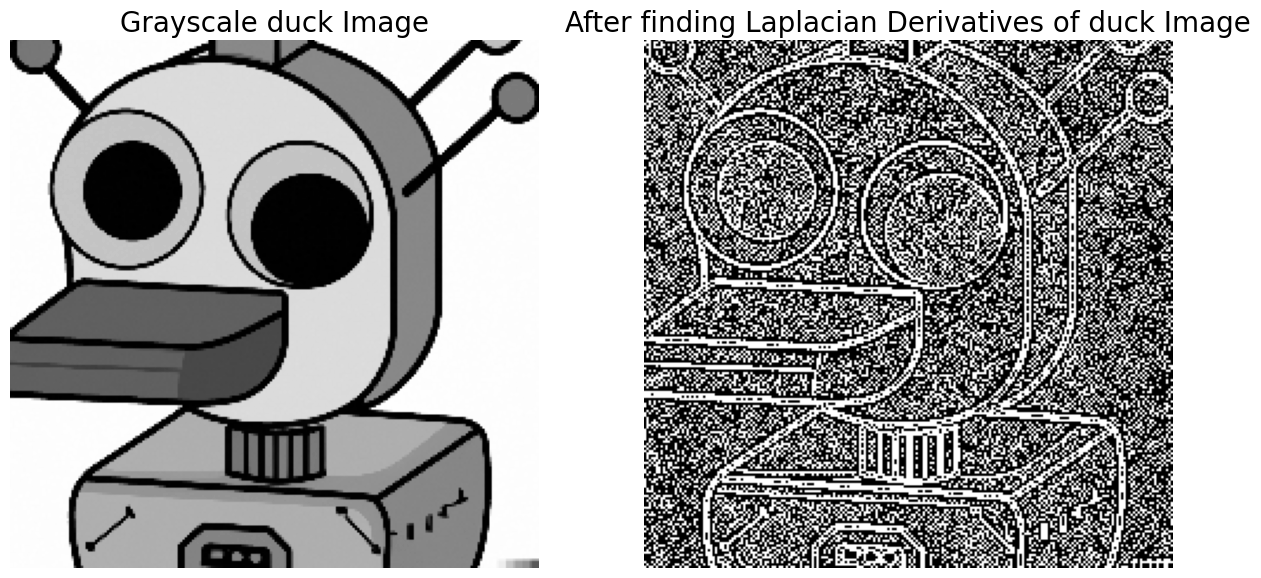

In [26]:
#image gradient
laplacian = cv2.Laplacian(resized_img, cv2.CV_64F)
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title(f'Grayscale {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img, cmap = 'gray')
plt.subplot(1, 2, 2).set_title(f'After finding Laplacian Derivatives of {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(cv2.cvtColor(laplacian.astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()

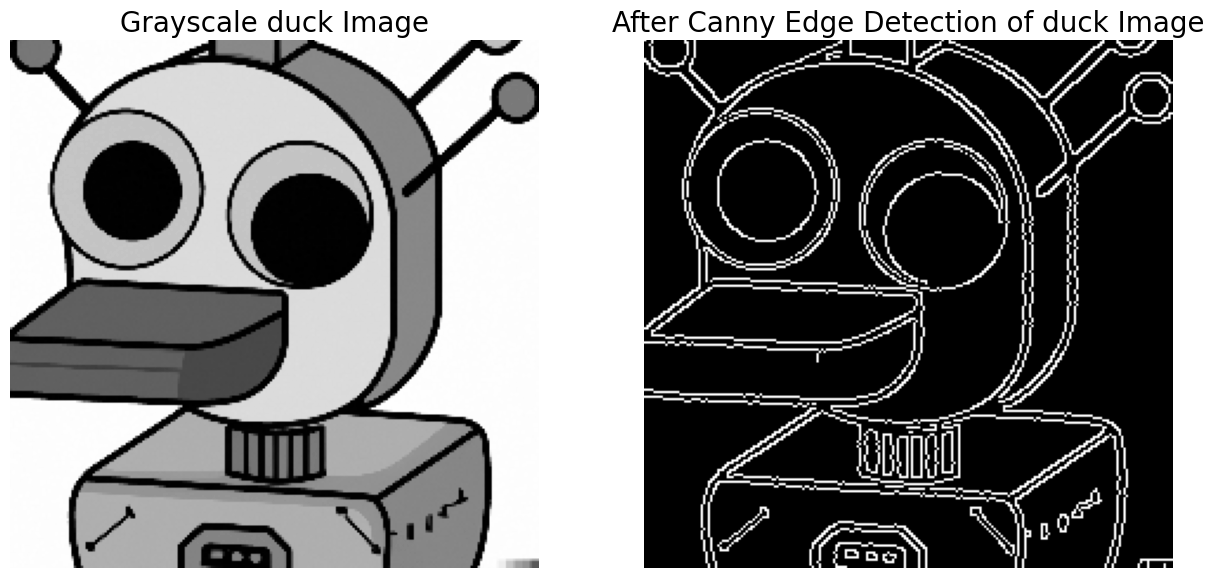

In [27]:
#edge detenction
edges = cv2.Canny(resized_img, threshold1 = 100, threshold2 = 200)
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title(f'Grayscale {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img, cmap = 'gray')
plt.subplot(1, 2, 2).set_title(f'After Canny Edge Detection of {name[ : -4]} Image', fontsize = font_size); plt.axis('off')
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

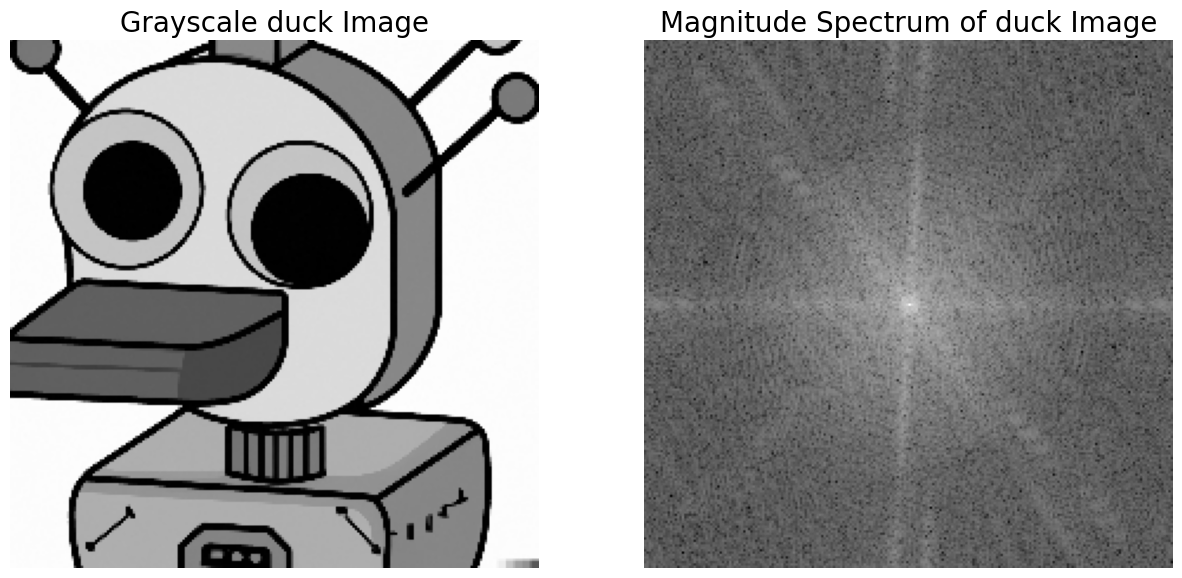

In [28]:
#trasformazione di fourier
freq = np.fft.fft2(resized_img)
freq_shift = np.fft.fftshift(freq)
magnitude_spectrum = 20 * np.log(np.abs(freq_shift))
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title(f'Grayscale {name[ : -4]} Image', fontsize = font_size); plt.axis('off')   
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2).set_title(f'Magnitude Spectrum of {name[ : -4]} Image', fontsize = font_size); plt.axis('off')   
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

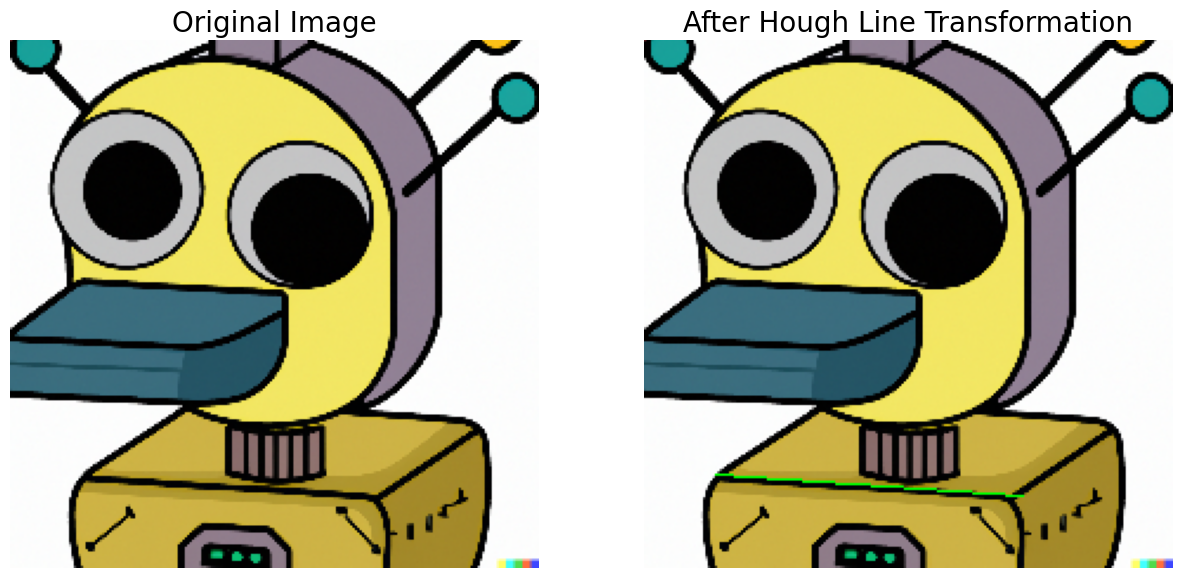

In [42]:
#line detection
min_line_length = 100
max_line_gap = 10
img = cv2.imread('./duck.png')
resized_img = cv2.resize(img, (height, width))
img_copy = resized_img.copy()
edges = cv2.Canny(resized_img, threshold1 = 50, threshold2 = 150)
lines = cv2.HoughLinesP(edges, rho = 1, theta = np.pi / 180, threshold = 100, minLineLength = min_line_length, maxLineGap = max_line_gap)
for line in lines:
    for x1, y1, x2, y2 in line:
        hough_lines_img = cv2.line(resized_img ,(x1,y1),(x2,y2),color = (0,255,0), thickness = 1)
        plt.figure(figsize=(15, 8))
        plt.subplot(1, 2, 1).set_title('Original Image', fontsize = font_size); plt.axis('off')   
        plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 2, 2).set_title('After Hough Line Transformation', fontsize = font_size); plt.axis('off')   
        plt.imshow(cv2.cvtColor(hough_lines_img, cv2.COLOR_BGR2RGB))
        plt.show()














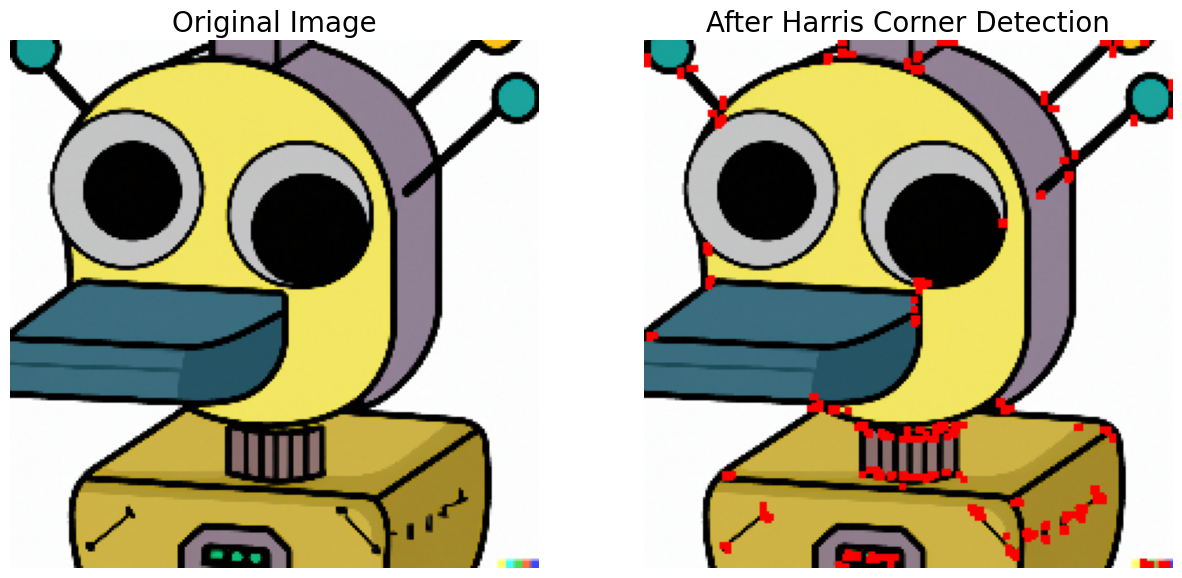

In [46]:
#corner detenction
img = cv2.imread('./duck.png')
resized_img = cv2.resize(img, (height, width))
img_copy = resized_img.copy()
gray = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
corners = cv2.cornerHarris(gray, blockSize = 2, ksize = 3, k = 0.1)
corners = cv2.dilate(corners, None)
resized_img[corners > 0.0001 * corners.max()] = [0, 0, 255]
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Original Image', fontsize = font_size); plt.axis('off')   
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2).set_title('After Harris Corner Detection', fontsize = font_size); plt.axis('off')   
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.show()


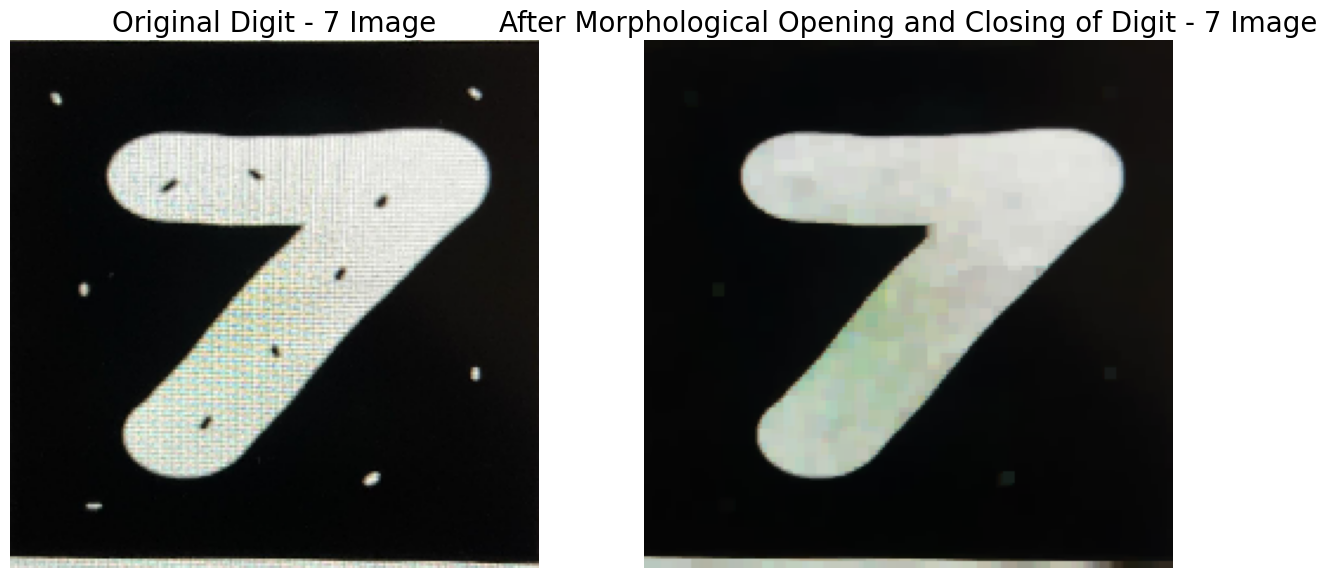

In [49]:
#morfological transformation
kernel = np.ones((5,5), np.uint8)
plt.figure(figsize=(15, 8))
img = cv2.imread('./sette_sgranato.jpeg', cv2.IMREAD_COLOR)
resized_img = cv2.resize(img, (height, width))
morph_open = cv2.morphologyEx(resized_img, cv2.MORPH_OPEN, kernel)
morph_close = cv2.morphologyEx(morph_open, cv2.MORPH_CLOSE, kernel)
plt.subplot(1,2,1).set_title('Original Digit - 7 Image', fontsize = font_size); plt.axis('off')   
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2).set_title('After Morphological Opening and Closing of Digit - 7 Image', fontsize = font_size); plt.axis('off')   
plt.imshow(cv2.cvtColor(morph_close, cv2.COLOR_BGR2RGB))
plt.show()

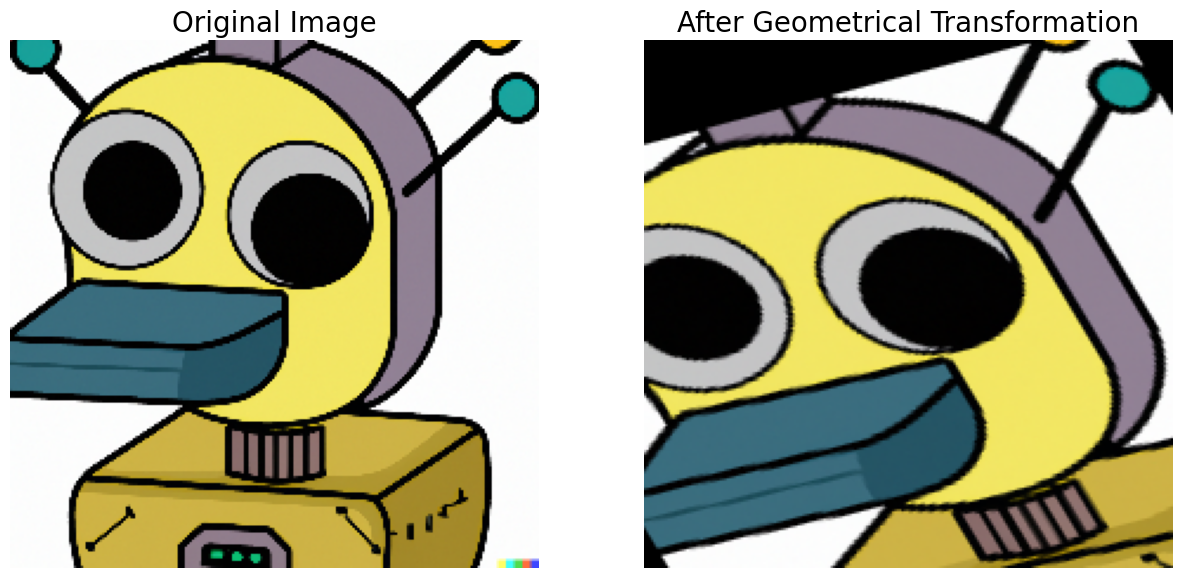

In [65]:
#geometrical transformation
img = cv2.imread('./duck.png')
resized_img = cv2.resize(img, (height, width))
img_copy = resized_img.copy()
rows, cols, ch = resized_img.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(resized_img, M, (cols, rows))
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Original Image', fontsize = font_size); plt.axis('off')
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2).set_title('After Geometrical Transformation', fontsize = font_size); plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

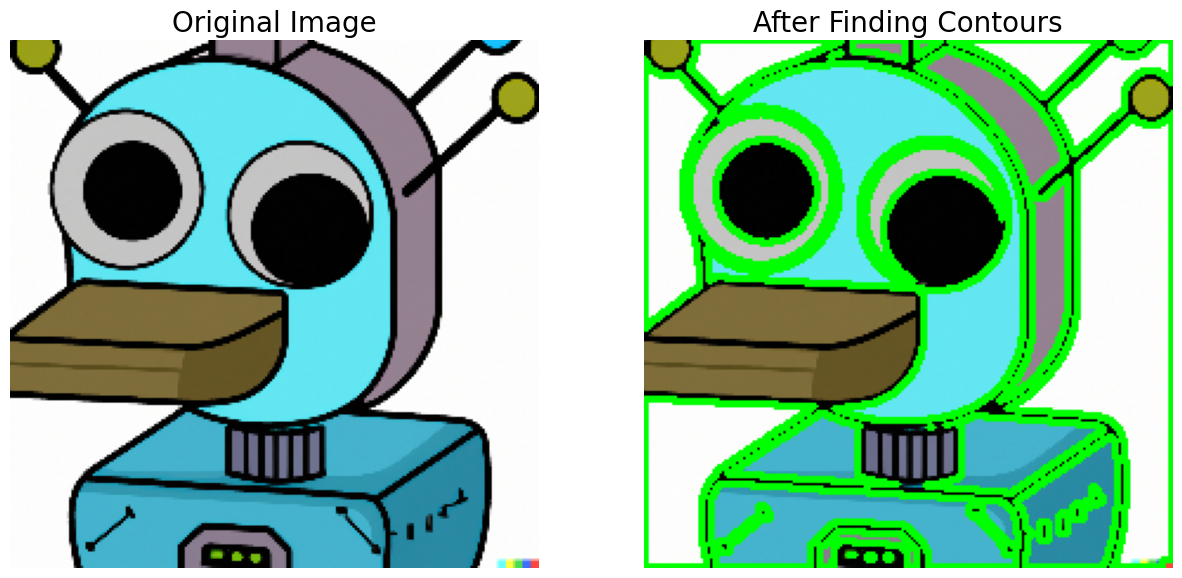

In [69]:
#contorni immagini
plt.figure(figsize=(15, 8))
img = cv2.imread('./duck.png', cv2.IMREAD_COLOR)
resized_img = cv2.resize(img, (height, width))
contours_img = resized_img.copy()
img_gray = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img_gray, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_NONE)
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0), thickness = 2)
plt.subplot(1,2,1).set_title('Original Image', fontsize = font_size); plt.axis('off')   
plt.imshow(resized_img)
plt.subplot(1,2,2).set_title('After Finding Contours', fontsize = font_size); plt.axis('off')   
plt.imshow(contours_img)
plt.show()

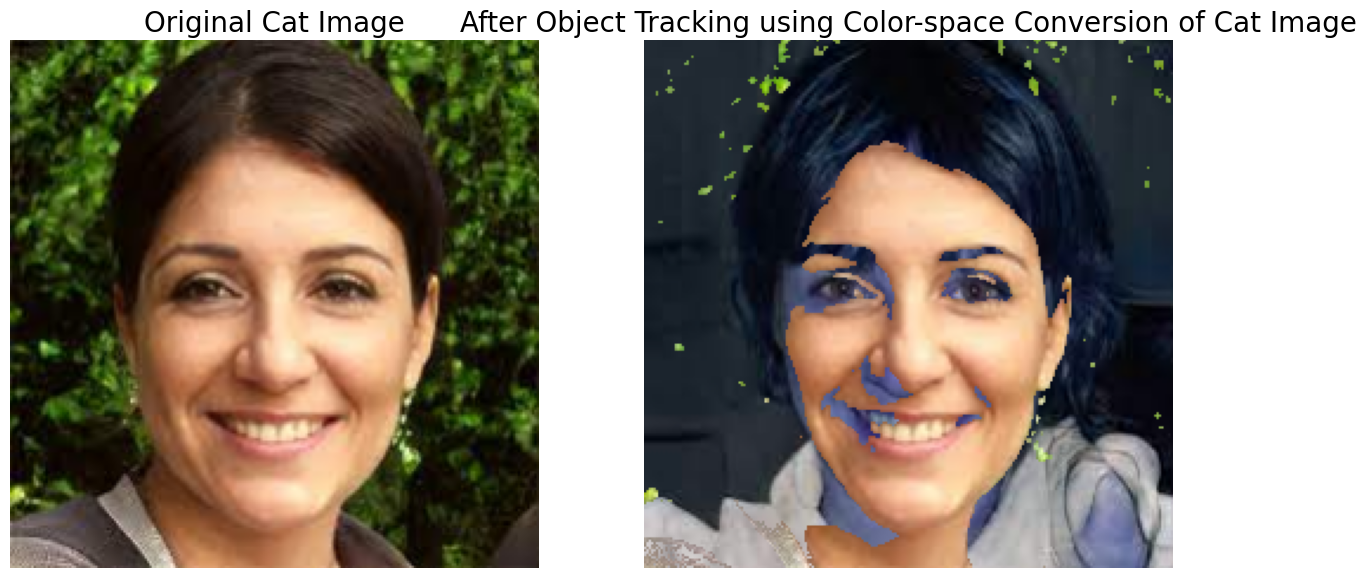

In [74]:
lower_white = np.array([0, 0, 150])
upper_white = np.array([255, 255, 255])
img = cv2.imread('./facetwo.jfif', cv2.IMREAD_COLOR)
img = cv2.resize(img, (height, width))
background = cv2.imread("./faceone.jfif", cv2.IMREAD_COLOR)
background = cv2.resize(background, (height, width))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_img, lowerb = lower_white, upperb = upper_white)
final_img = cv2.bitwise_and(img, img, mask = mask)
final_img = np.where(final_img == 0, background, final_img)
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1).set_title('Original  Image', fontsize = font_size); plt.axis('off')   
plt.imshow(img)
plt.subplot(1,2,2).set_title('After Object Tracking using Color-space Conversion of  Image', fontsize = font_size); plt.axis('off')   
plt.imshow(final_img)
plt.show()

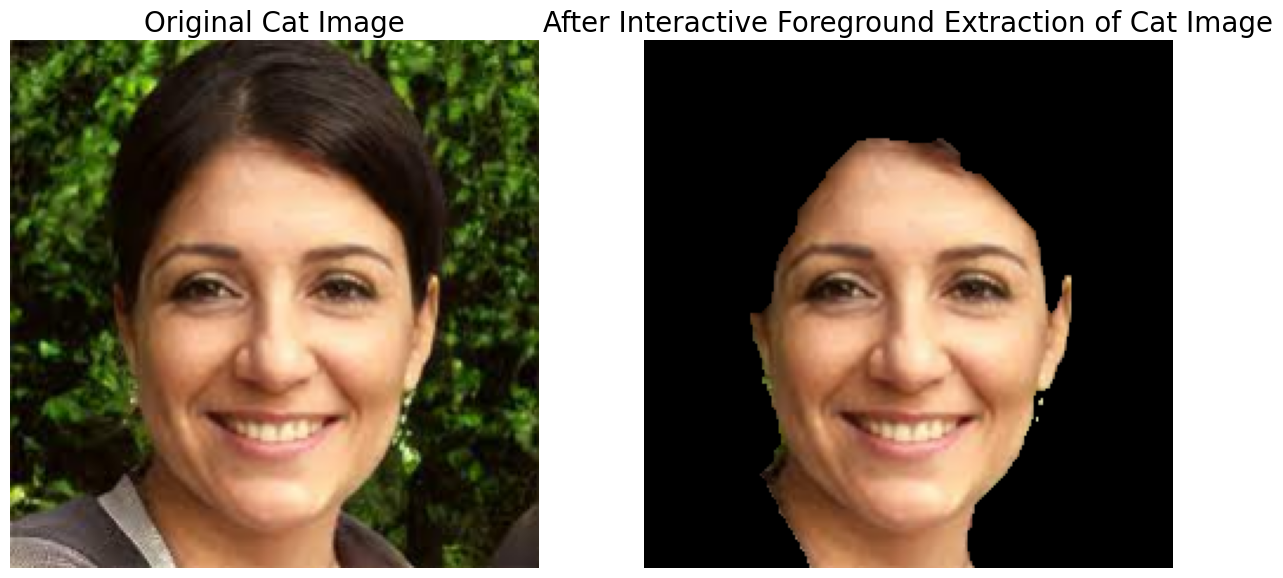

In [84]:
#background remove
img = cv2.imread('./facetwo.jfif', cv2.IMREAD_COLOR)
img = cv2.resize(img, (height, width))
img_copy = img.copy()
mask = np.zeros(img.shape[ : 2], np.uint8)
background_model = np.zeros((1,65),np.float64)
foreground_model = np.zeros((1,65),np.float64)
rect = (10, 10, 224, 224)
cv2.grabCut(img, mask = mask, rect = rect, bgdModel = background_model, fgdModel = foreground_model, iterCount = 60, mode = cv2.GC_INIT_WITH_RECT)
new_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img = img * new_mask[:, :, np.newaxis]
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1).set_title('Original Cat Image', fontsize = font_size); plt.axis('off')   
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2).set_title('After Interactive Foreground Extraction of Cat Image', fontsize = font_size); plt.axis('off')   
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

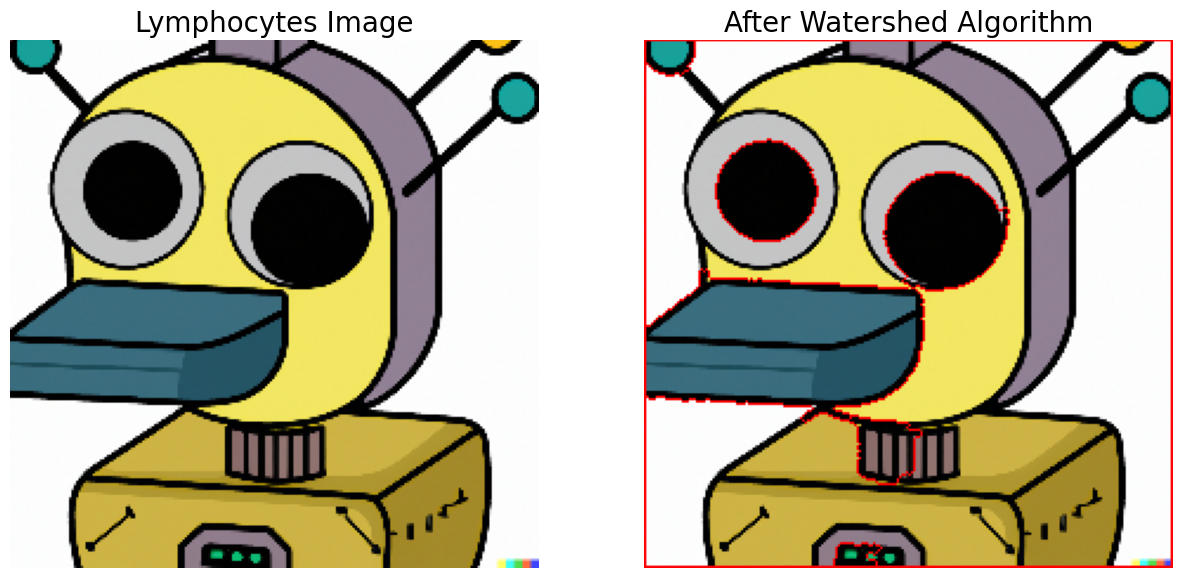

In [96]:
#imagesegmentation
img = cv2.imread('./duck.png', cv2.IMREAD_COLOR)
resized_img = cv2.resize(img, (height, width))
img_copy = resized_img.copy()
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, thresh = 0, maxval = 255, type = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
opening = cv2.morphologyEx(thresh, op = cv2.MORPH_OPEN, kernel = kernel, iterations = 2)
background = cv2.dilate(opening, kernel = kernel, iterations = 5)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, foreground = cv2.threshold(dist_transform, thresh = 0.1  * dist_transform.max(), maxval = 195, type = cv2.THRESH_BINARY)
foreground = np.uint8(foreground)
unknown = cv2.subtract(background, foreground)
ret, markers = cv2.connectedComponents(foreground)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(resized_img, markers)
resized_img[markers == -1] = [0, 0, 255]
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Lymphocytes Image', fontsize = font_size); plt.axis('off') 
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2).set_title('After Watershed Algorithm', fontsize = font_size); plt.axis('off')   
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.show()